In [1]:
import pandas as pd
import matplotlib as plot

In [2]:
def p2f(x):
    return float(x.strip('%'))

btc_usdt_funding = pd.read_csv('data/資金費率歷史_BTCUSDT 永續_2021-08-24.csv', index_col=0, parse_dates=True, converters={'資金費率':p2f})
btc_usdt_funding = btc_usdt_funding.sort_index(ascending=True)
btc_usdt_funding.head()

,合約,資金費率間隔,資金費率
時間,,,
2019-09-10 16:00:00,BTCUSDT 永續,8小時,0.01
2019-09-11 00:00:00,BTCUSDT 永續,8小時,0.01
2019-09-11 08:00:00,BTCUSDT 永續,8小時,0.01
2019-09-11 16:00:00,BTCUSDT 永續,8小時,0.01
2019-09-12 00:00:00,BTCUSDT 永續,8小時,0.01


<AxesSubplot:xlabel='時間'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0, flags=flags)


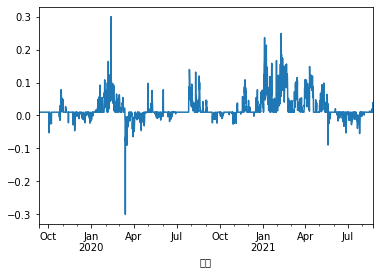

In [3]:
btc_usdt_funding['資金費率'].plot()

In [4]:
btc_usdt_funding['資金費率總和'] = btc_usdt_funding['資金費率'].cumsum()

btc_usdt_funding[['資金費率', '資金費率總和']]

,資金費率,資金費率總和
時間,,
2019-09-10 16:00:00,0.0100,0.0100
2019-09-11 00:00:00,0.0100,0.0200
2019-09-11 08:00:00,0.0100,0.0300
2019-09-11 16:00:00,0.0100,0.0400
2019-09-12 00:00:00,0.0100,0.0500
...,...,...
2021-08-23 08:00:00,0.0100,43.4036
2021-08-23 16:00:00,0.0391,43.4427
2021-08-24 00:00:00,0.0239,43.4666


<AxesSubplot:xlabel='時間'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0, flags=flags)


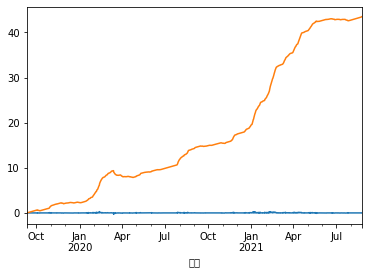

In [5]:
btc_usdt_funding['資金費率'].plot()
btc_usdt_funding['資金費率總和'].plot()

<AxesSubplot:xlabel='時間'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0, flags=flags)


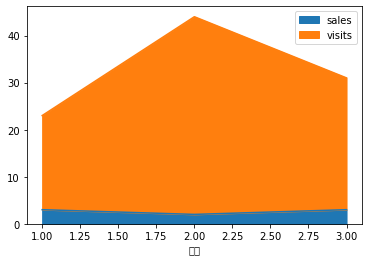

In [6]:
df = pd.DataFrame({
    'sales': [3, 2, 3],
    'visits': [20, 42, 28],
    '時間': [1, 2, 3],
})
df.plot.area(y=['sales', 'visits'], x='時間')

In [7]:
import time
import hmac
import requests
from requests import Request

ts = int(time.time() * 1000)
request = Request('GET', 'https://ftx.com/api/funding_payments')
prepared = request.prepare()
signature_payload = f'{ts}{prepared.method}{prepared.path_url}'.encode()
print(signature_payload)
signature = hmac.new('GDrsJTjOjDK2ZaCiekW7M5EOe4J-OKdEit4bec-w'.encode(), signature_payload, 'sha256').hexdigest()
print(signature)

request.headers['FTX-KEY'] = '651Xim-hOUM96Rj_kpKIs3SkLRcVF0ZGJbsfWcRf'
request.headers['FTX-SIGN'] = signature
request.headers['FTX-TS'] = str(ts)

print(prepared.body)
print(prepared.headers)

b'1630423638065GET/api/funding_payments'
7f08cb36aa074cf0ff26de88c7e735d5a8dffa7c1e5984660f6fa408e9be122f
None
{}


In [8]:
funding_rates = requests.get('https://ftx.com/api/funding_rates').json()
df = pd.DataFrame(funding_rates['result'])
df

,future,rate,time
0,STORJ-PERP,0.000014,2021-08-31T15:00:00+00:00
1,HOT-PERP,0.000040,2021-08-31T15:00:00+00:00
2,MEDIA-PERP,0.000000,2021-08-31T15:00:00+00:00
3,SC-PERP,-0.000028,2021-08-31T15:00:00+00:00
4,XTZ-PERP,0.000049,2021-08-31T15:00:00+00:00
...,...,...,...
495,DAWN-PERP,-0.000188,2021-08-31T12:00:00+00:00
496,HUM-PERP,0.000174,2021-08-31T12:00:00+00:00
497,GRT-PERP,0.000040,2021-08-31T12:00:00+00:00
498,CRV-PERP,-0.000003,2021-08-31T12:00:00+00:00


In [9]:
markets['result']

NameError: name 'markets' is not defined

## Binance funding rate history api

In [47]:
import requests
import pandas as pd
import matplotlib as plot
from datetime import datetime

funding_history_api = 'https://www.binance.com/bapi/futures/v1/public/future/common/get-funding-rate-history'
payload = {'symbol':'BTCUSDT', 'page':1, 'rows':9999}
# print(json.dumps(payload))
r = requests.post(funding_history_api, json = payload)

# print(r.headers)
result = r.json()
data = result['data']
# print(len(data))
# print(data)

df = pd.DataFrame(data)

# convert timestamp to datetime
df['calcTime'] = [datetime.fromtimestamp(x/1000) for x in df['calcTime']]

# set index
df = df.set_index('calcTime')
df = df.sort_index()

# convert string to float
df['lastFundingRate'] = [float(x) * 100 for x in df['lastFundingRate']]

# summary
df['rateSum'] = df['lastFundingRate'].cumsum()


print(df.dtypes)
df

symbol                   object
fundingIntervalHours      int64
lastFundingRate         float64
rateSum                 float64
dtype: object


,symbol,fundingIntervalHours,lastFundingRate,rateSum
calcTime,,,,
2019-09-10 16:00:00.000,BTCUSDT,8,0.010000,0.010000
2019-09-11 00:00:00.000,BTCUSDT,8,0.010000,0.020000
2019-09-11 08:00:00.000,BTCUSDT,8,0.010000,0.030000
2019-09-11 16:00:00.000,BTCUSDT,8,0.010000,0.040000
2019-09-12 00:00:00.000,BTCUSDT,8,0.010000,0.050000
...,...,...,...,...
2021-09-07 16:00:00.002,BTCUSDT,8,0.010000,44.467642
2021-09-08 00:00:00.001,BTCUSDT,8,0.022977,44.490619
2021-09-08 08:00:00.005,BTCUSDT,8,0.010000,44.500619


<AxesSubplot:xlabel='calcTime'>

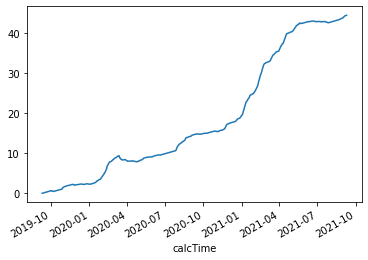

In [48]:
df['rateSum'].plot()

In [122]:
import requests
import pandas as pd
# import matplotlib as plot
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(20,10))
def plot_history(symbol):
    funding_history_api = 'https://www.binance.com/bapi/futures/v1/public/future/common/get-funding-rate-history'
    payload = {'symbol':symbol, 'page':1, 'rows':9999}
    # print(json.dumps(payload))
    r = requests.post(funding_history_api, json = payload)

    # print(r.headers)
    result = r.json()
    data = result['data']
    # print(len(data))
    # print(data)

    df = pd.DataFrame(data)

    # convert timestamp to datetime
    df['calcTime'] = [datetime.fromtimestamp(x/1000) for x in df['calcTime']]

    # set index
    df = df.set_index('calcTime')
    df = df.sort_index()

    # convert string to float
    df['lastFundingRate'] = [float(x) * 100 for x in df['lastFundingRate']]

    # summary
    df['rateSum'] = df['lastFundingRate'].cumsum()


    # print(df.dtypes)
    print(symbol)
#     
    plt.plot(df['rateSum'], label=symbol)


<Figure size 1440x720 with 0 Axes>

133
BTCUSDT
ETHUSDT
BCHUSDT


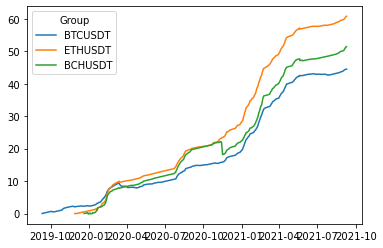

In [123]:
# plot_history('BTCUSDT')
# plot_history('ETHUSDT')

table_perpetual = pd.read_html('https://www.binance.com/en/futures/trading-rules/perpetual')
len(table_perpetual)

table_perpetual[0]
table_perpetual = table_perpetual[0].iloc[:, lambda df: [0]]
table_perpetual

print(len(table_perpetual))
table_perpetual['Symbol'] = [x.split(' ')[0] for x in table_perpetual['Symbol']]
table_perpetual = table_perpetual.loc[table_perpetual['Symbol'].str.contains('USDT')]
for symbol in table_perpetual['Symbol'].head(3):
    plot_history(symbol)
    
plt.legend(title='Group')

plt.show()

symbol                   object
fundingIntervalHours      int64
lastFundingRate         float64
rateSum                 float64
dtype: object


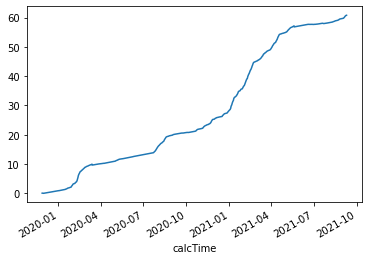

133
BTCUSDT
ETHUSDT
BCHUSDT
XRPUSDT
EOSUSDT
LTCUSDT
TRXUSDT
ETCUSDT
LINKUSDT
XLMUSDT


In [84]:
aa = [1,2,3]

for i, x in aa:
    print(i, x)

TypeError: cannot unpack non-iterable int object